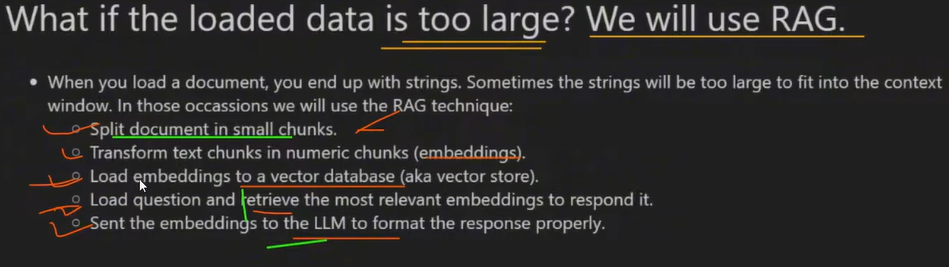

## Splitting/Splitter

- Devide a Large data asset in Small Parts

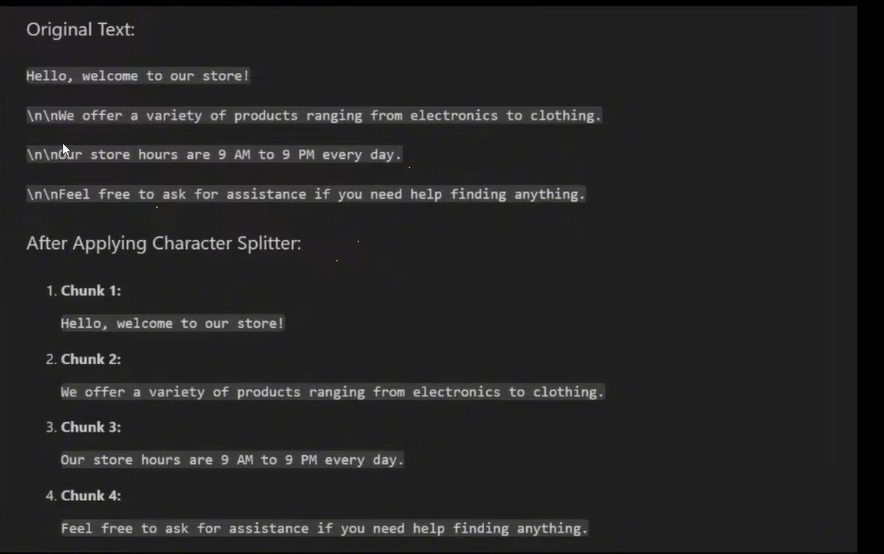

## How we perfom the chunking, i mean spliting?

### There is two method for Chunking, these are : 
 1.  Character text splitter
 2.  RecursiveCharacterTextSplitter


---

### **1. CharacterTextSplitter**

* **Purpose:** Simple way to split text into chunks.
* **How it works:** Cuts text based on a chosen separator (default: newline `\n`).
* **Use case:** Structured/simple text (logs, lists, CSV-like data).
* **Limitation:** Doesn’t preserve natural sentences or paragraphs well.

---

### **2. RecursiveCharacterTextSplitter**

* **Purpose:** Smarter, context-friendly chunking.
* **How it works:** Uses a hierarchy of separators: `["\n\n", "\n", " ", ""]` (paragraph → line → word → character).
* **Use case:** Natural language text (articles, books, documents).
* **Advantage:** Maintains context better, avoids breaking sentences unnaturally.

---

👉 **Tip:**
Use `RecursiveCharacterTextSplitter` for most real-world cases.
Use `CharacterTextSplitter` only for simple, structured text.

---



## **1. CharacterTextSplitter Example**

👉 Splits only by a chosen separator (e.g., newline).

```python
from langchain.text_splitter import CharacterTextSplitter

text = "Hello world.\nLangChain is awesome.\nWe are learning chunking."

splitter = CharacterTextSplitter(
    chunk_size=20,
    chunk_overlap=5,
    separator="\n"   # split only on newlines
)

chunks = splitter.split_text(text)
print(chunks)
```

🔹 **Output:**

```python
['Hello world.', 
 'LangChain is awesome.', 
 'We are learning chunking.']
```

---

## **2. RecursiveCharacterTextSplitter Example**

👉 Splits smartly by paragraphs → lines → words → characters.

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = """LangChain makes working with LLMs easier.
It handles chunking, embeddings, and retrieval."""

splitter = RecursiveCharacterTextSplitter(
    chunk_size=30,
    chunk_overlap=5
)

chunks = splitter.split_text(text)
print(chunks)
```

🔹 **Output:**

```python
['LangChain makes working with',
 'with LLMs easier. It handles',
 'handles chunking, embeddings,',
 'embeddings, and retrieval.']
```

---

✅ **Key takeaway:**

* `CharacterTextSplitter` → straight cut on one separator.
* `RecursiveCharacterTextSplitter` → tries multiple levels (para → line → word → char) for natural splits.

---


---

## **১. Separator ভিত্তিক কাটার ক্ষেত্রে (`\n`, `\n\n`)**

* যদি আপনি **CharacterTextSplitter** ব্যবহার করেন এবং `separator="\n"` বা `"\n\n"` দেন, তাহলে **Splitter সেই separator খুঁজে টেক্সট কাটবে।**
* অর্থাৎ, **আপনার টেক্সট ফাইলে আগে থেকে `\n` বা `\n\n` থাকা দরকার**, না থাকলে splitter পুরো টেক্সটকে একটিই chunk হিসেবে নেবে।
* Separator শুধু নির্দেশ দেয় **কোথায় “প্রথম চেষ্টা” কাটতে হবে**।

---

## **২. Chunk size ভিত্তিক কাটার ক্ষেত্রে**

* RecursiveCharacterTextSplitter বা CharacterTextSplitter দুটিই **chunk\_size** ব্যবহার করে।
* ধরুন separator খুঁজে পাওয়া যায় না বা chunk size বেশি → splitter **স্বয়ংক্রিয়ভাবে chunk\_size অনুযায়ী কেটে দিবে**।
* তাই **`\n`/`\n\n` থাকা আবশ্যক নয়**, কিন্তু থাকলে context আরো প্রাকৃতিকভাবে ভাগ হয়।

---

## 🔹 উদাহরণ

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = "Hello Mr. Sr. LangChain is awesome. We are learning chunking."

splitter = RecursiveCharacterTextSplitter(
    chunk_size=20,
    chunk_overlap=5,
    separators=["\n\n", "\n", " ", ""]
)

chunks = splitter.split_text(text)
print(chunks)
```

**Output:**

```python
['Hello Mr. Sr. LangChain',
 'LangChain is awesome. We',
 'We are learning chunking.']
```

* এখানে কোনো newline ছিল না।
* Splitter **space এবং character** ব্যবহার করে chunk তৈরি করেছে।

---

✅ **সারাংশ:**

1. **Separator আছে → splitter চেষ্টা করবে natural cut করতে**।
2. **Separator নেই → chunk\_size অনুযায়ী স্বয়ংক্রিয়ভাবে কেটে দিবে।**
3. RecursiveCharacterTextSplitter → smart splitting, separator hierarchy ব্যবহার করে context বজায় রাখে।

---
